# k-Means Clustering
### What is k-Means Clustering?
K-means clustering is used to determine discrete labeling of groups of points. It is unsupervised and the user must select the number of clusters

### Methodology

#### Expectation Maximization (E-M)
1. Guess cluster centers
2. Assign points to the nearest cluster center 
3. Set the cluster centers to the mean

### Cons
1. E-M may not lead to the *global* best solution
2. Number of clusters must be selected beforehand
    1. Alternatives
        1. Consider "Silhouette analysis" if not intuitive
        2. Gaussian mixture models which provide level of fitness per number of cluster
        3. Method that chooses clusters for you (DBSCAN, mean-shift, affinity propogation in sklearn.cluster)
3. Limited to linear cluster boundaries (Ex: two archs)
    1. Alternatives
        1. Use kernal transformation to project the data into a higher dimension where linear separation is possible: `SpectralClustering` estimator
4. Slow for large numbers of samples
    1. Alternatives
        1. Batch-based k-means

### Packages
- Scikit-Learn
    - `conda install sci-kit learn`
- Matplotlib
- Seaborn
- Numpy


In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

## Example
#### Given
- 2-D dataset
- 4 blobs
- No labels (unsupervised)

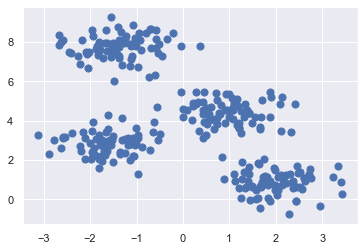

In [60]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [61]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

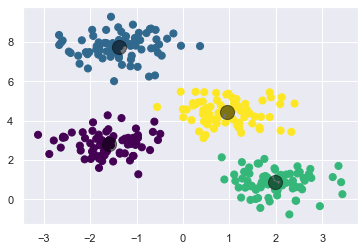

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha = 0.5)

### Make k-Means algorithm

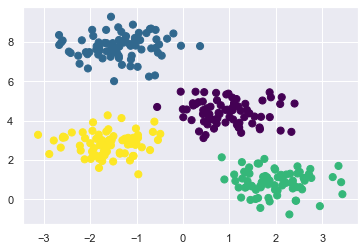

In [56]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
        # X.shape[0] returns # or rows. [1] would give # of columns
        # rng.Permutation(300) gives list of values between 0-299 set in list randomly
        # rseed = 2 uses Binomial distribution to choose randomization
    centers = X[i]
    # Choose 4 random points to be initial clusters 
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
            # For each row in X, computes the row of centers which is closest
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
            # (1) Takes indicies of X where label is 0, 1, 2, 3
            # (2) Finds average of columns mean(0), mean(1) would be rows
            
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Example: Initial Guess does not lead to *global* solution
Run algorithm for multiple starting guesses. Scikit-Learn does this by default: `n_init = 10`

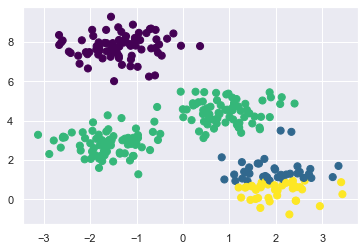

In [57]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### The number of clusters must be selected beforehand

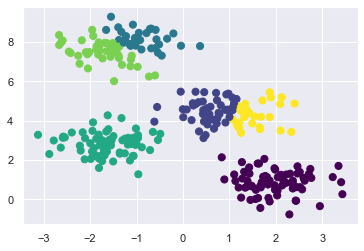

In [62]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### k-means is limited to linear cluster boundaries

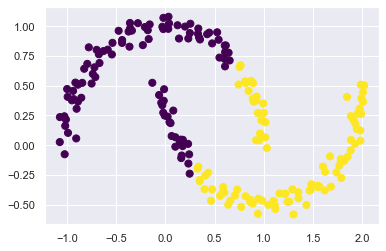

In [63]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### k-means can be slow for a large number of samples
Because it must access every point in the dataset. Instead, just use a subset of data to update the cluster centers. This is *batch-based k-means* which is implemented in `sklearn.cluster.MiniBatchKMeans`.

# Examples

### Digits
Digits consist of 1,797 samples with 64 features. Each of the 64 features is the brightness of one pixel in an 8x8 image.

In [68]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [69]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
print(clusters)
kmeans.cluster_centers_.shape

[5 7 7 ... 7 3 3]


(10, 64)